## Analyse : 
    - On recherche le meilleur dé pour chaque rank
    - On cherche la moyenne / médianne des dés par rank
    - On cherche le meilleur dé global
    - Le dé avec la variance la plus variée
    - le dé le plus "stable"
 
    
- PAR HEURE

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
dice_data = pd.DataFrame(pd.read_csv("donnees_14h35.csv"))
dice_data.groupby('Nom_dé')['Résultat'].mean()

Nom_dé
Base_Dice         4.9923
Power_Dice        6.6564
normal_dice      10.4960
parabole_dice     3.3541
rank_dice         6.0500
scale_dice       10.4380
unscale_dice      9.7680
Name: Résultat, dtype: float64

In [10]:
moyenne_par_de_et_rank = dice_data.groupby(['Nom_dé', 'Rank'])['Résultat'].mean().unstack()
moyenne_par_de_et_rank

Rank,Bronze,Challenger,Diamond,Emerald,Gold,Grand Master,Iron,Master,Platinum,Silver
Nom_dé,,,,,,,,,,
Base_Dice,4.073,6.065,4.910,6.170,3.952,7.071,3.403,5.496,4.520,4.263
Power_Dice,3.932,10.776,8.217,8.392,6.010,8.734,2.043,6.077,7.335,5.048
normal_dice,10.329,10.613,10.219,10.504,10.464,10.808,10.613,10.439,10.329,10.642
parabole_dice,3.788,3.708,1.751,1.464,1.405,7.762,7.360,3.881,0.616,1.806
rank_dice,2.447,10.584,7.537,6.534,4.486,9.589,1.540,8.743,5.450,3.590
scale_dice,14.120,6.820,8.400,9.180,11.580,7.080,16.600,8.200,9.760,12.640
unscale_dice,5.680,13.640,11.820,11.580,9.420,12.680,3.300,12.240,10.160,7.160


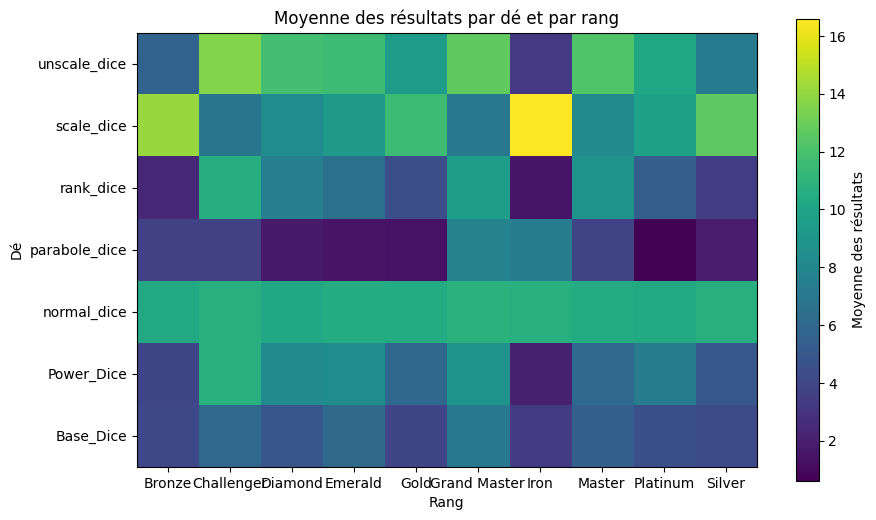

In [11]:
plt.figure(figsize=(10, 6))
plt.imshow(moyenne_par_de_et_rank, cmap='viridis', interpolation='nearest')

plt.colorbar(label='Moyenne des résultats')
plt.xlabel('Rang')
plt.ylabel('Dé')
plt.title('Moyenne des résultats par dé et par rang')


plt.xticks(range(len(moyenne_par_de_et_rank.columns)), moyenne_par_de_et_rank.columns)
plt.yticks(range(len(moyenne_par_de_et_rank.index)), moyenne_par_de_et_rank.index)
plt.gca().invert_yaxis() 
plt.show()

In [12]:
df = dice_data

nouveau_df = pd.DataFrame(columns=df['Nom_dé'].unique())

for nom_de in nouveau_df.columns:
    resultat_de = df.loc[df['Nom_dé'] == nom_de, 'Résultat']
    nouveau_df[nom_de] = resultat_de.values

print(nouveau_df)

      Base_Dice  Power_Dice  rank_dice  scale_dice  unscale_dice  normal_dice  \
0             2           2          1          20             0            7   
1             2           2          1           0             0           15   
2             5           2          2          20             0           10   
3             6           3          1          20             0            2   
4             2           2          2          20            20            9   
...         ...         ...        ...         ...           ...          ...   
9995          3           4          4          20            20            8   
9996         10          18          5          20            20           10   
9997          8          18          8           0            20           14   
9998          5           4         13           0            20           13   
9999          6          18          3           0             0           17   

      parabole_dice  
0    

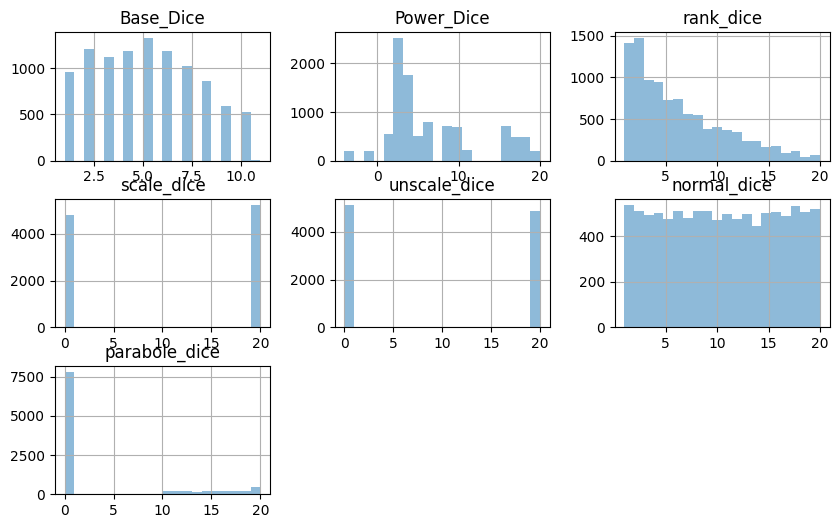

In [13]:
nouveau_df.hist(figsize=(10, 6), bins=20, alpha=0.5)
plt.title('Histogramme des résultats de chaque dé')
plt.xlabel('Résultat')
plt.ylabel('Fréquence')
plt.legend(nouveau_df.columns)
plt.grid(False)
plt.show()

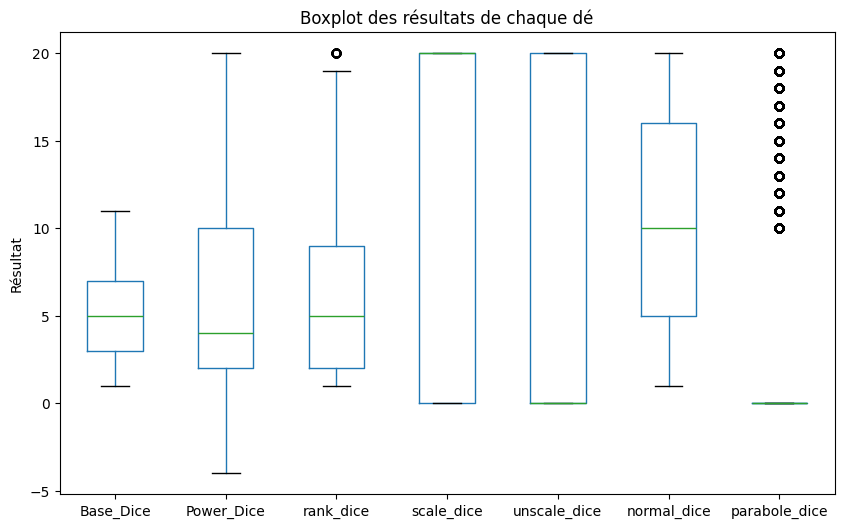

In [14]:
nouveau_df.boxplot(figsize=(10, 6))
plt.title('Boxplot des résultats de chaque dé')
plt.ylabel('Résultat')
plt.grid(False)
plt.show()

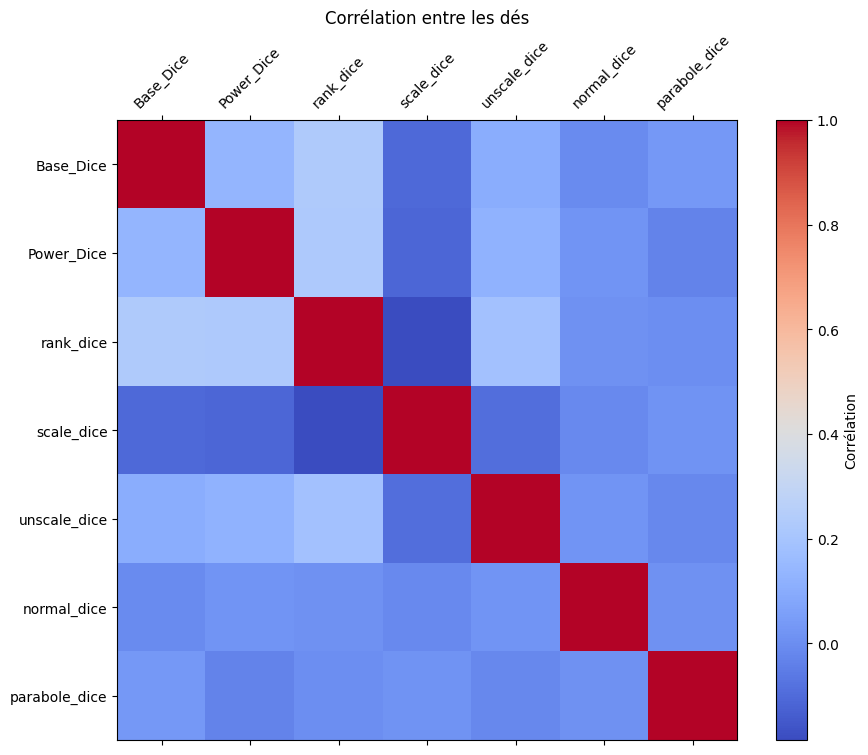

In [15]:
correlation = nouveau_df.corr()
plt.figure(figsize=(10, 8))
plt.matshow(correlation, cmap='coolwarm', fignum=1)
plt.colorbar(label='Corrélation')
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title('Corrélation entre les dés')
plt.show()

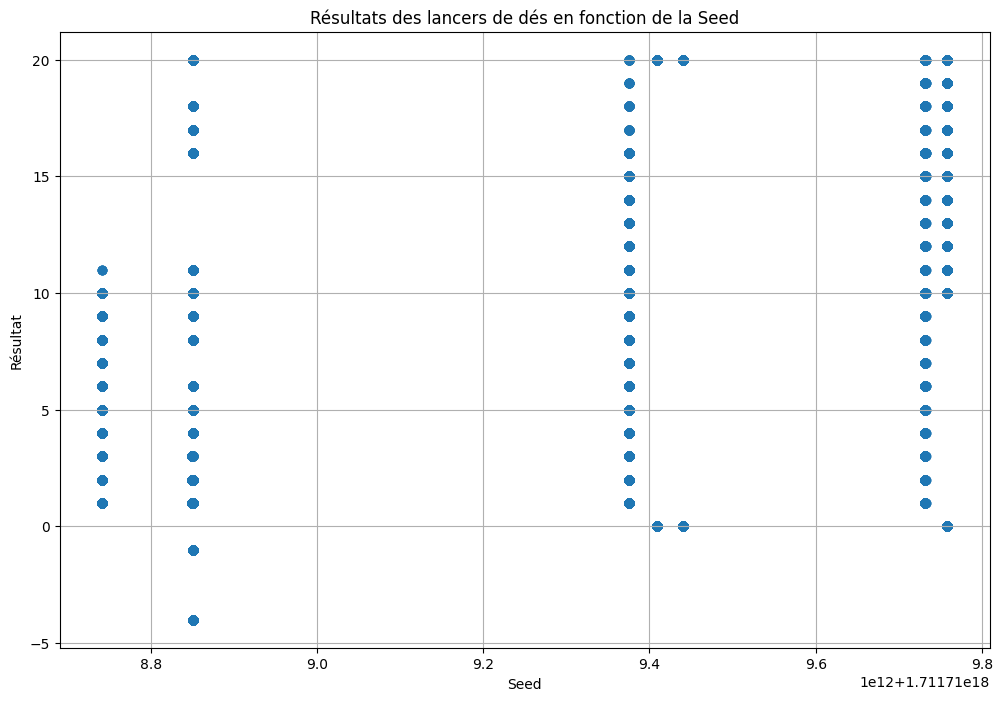

In [16]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Seed'], df['Résultat'], alpha=0.5)
plt.title('Résultats des lancers de dés en fonction de la Seed')
plt.xlabel('Seed')
plt.ylabel('Résultat')
plt.grid(True)
plt.show()